Before removing null and duplicate values:

       Gender  Hemoglobin   MCH  MCHC   MCV  Result
0          1        14.9  22.7  29.1  83.7       0
1          0        15.9  25.4  28.3  72.0       0
2          0         9.0  21.5  29.6  71.2       1
3          0        14.9  16.0  31.4  87.5       0
4          1        14.7  22.0  28.2  99.5       0
...      ...         ...   ...   ...   ...     ...
1416       0        10.6  25.4  28.2  82.9       1
1417       1        12.1  28.3  30.4  86.9       1
1418       1        13.1  17.7  28.1  80.7       1
1419       0        14.3  16.2  29.5  95.2       0
1420       0        11.8  21.2  28.4  98.1       1

[1421 rows x 6 columns]

After removing null and duplicate values:

      Gender  Hemoglobin   MCH  MCHC    MCV  Result
0         0        11.1  18.3  28.5   73.3       1
1         1        13.9  20.6  29.2   98.5       0
2         1        16.4  24.4  30.6   77.4       0
3         0        10.5  25.5  29.6   83.2       1
4         1       

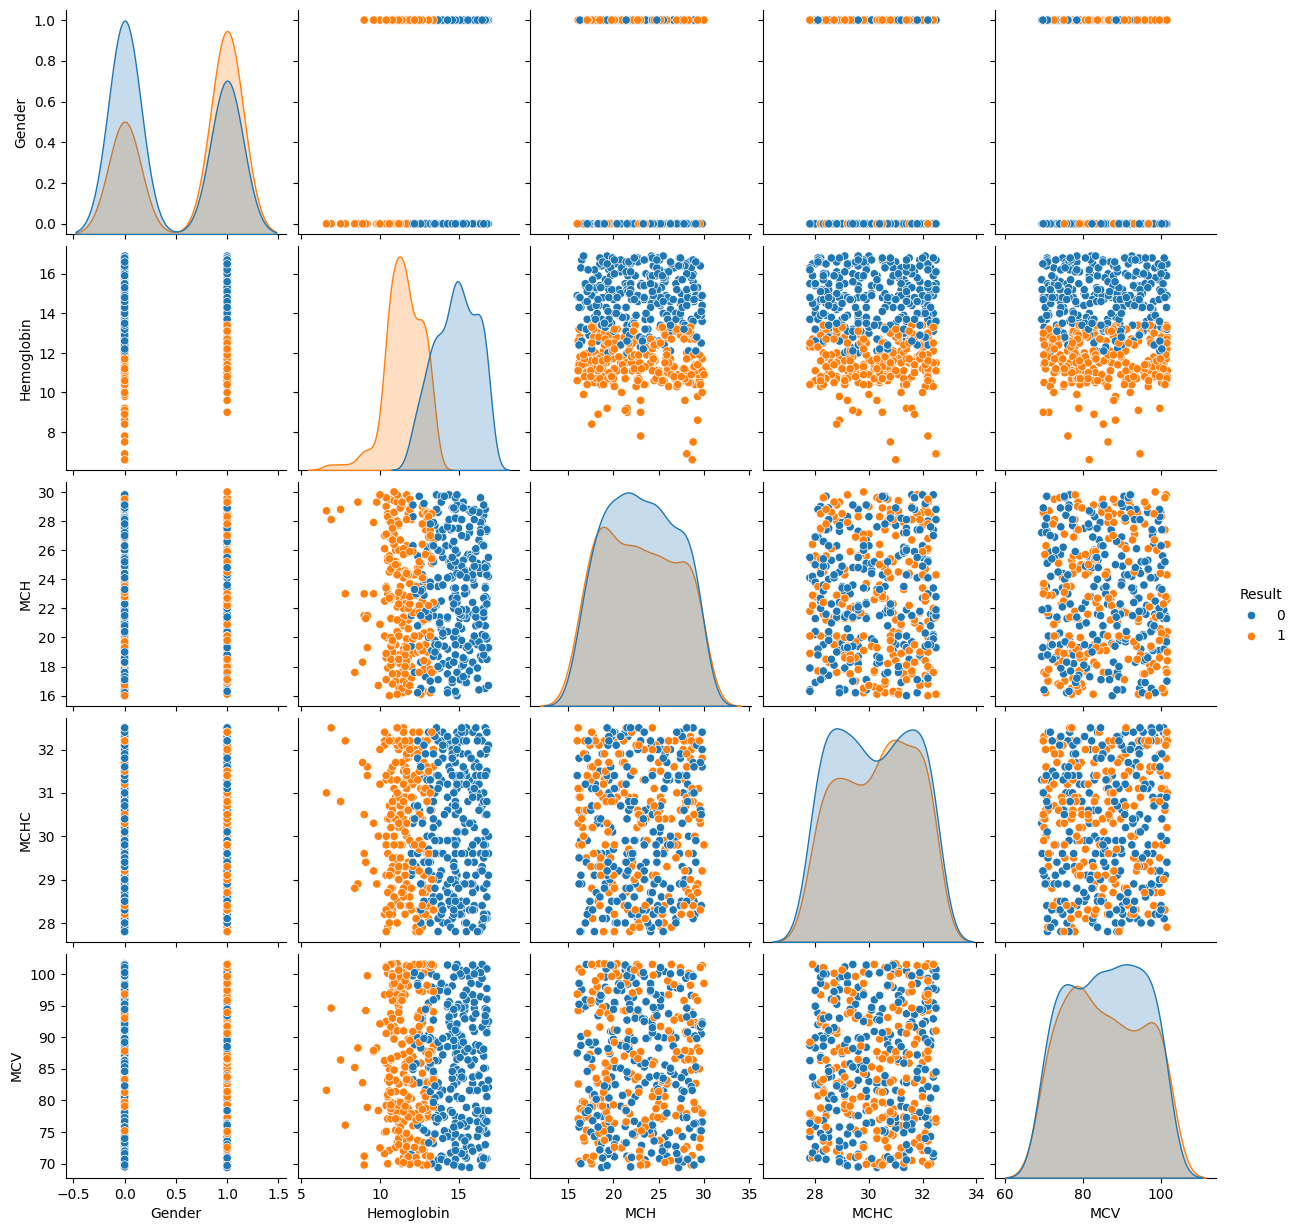

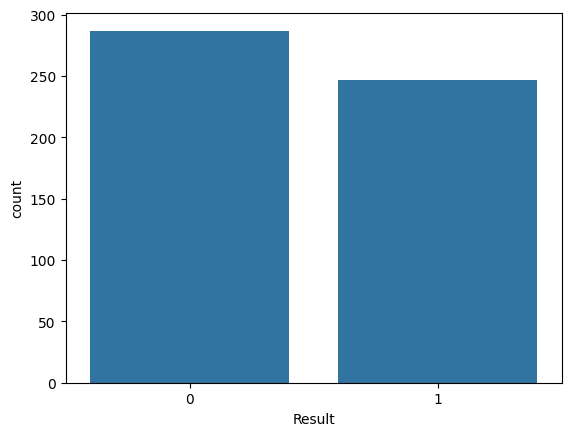


Decision Tree Metrics:
Accuracy: 0.89
Precision: 0.79
Recall: 1.00
F1 Score: 0.88


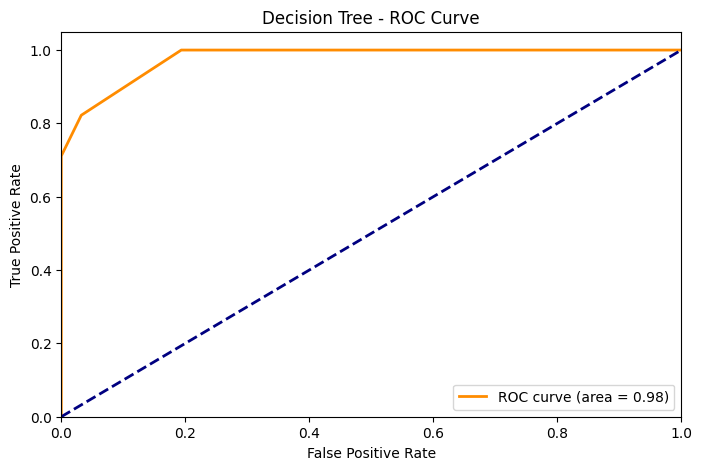

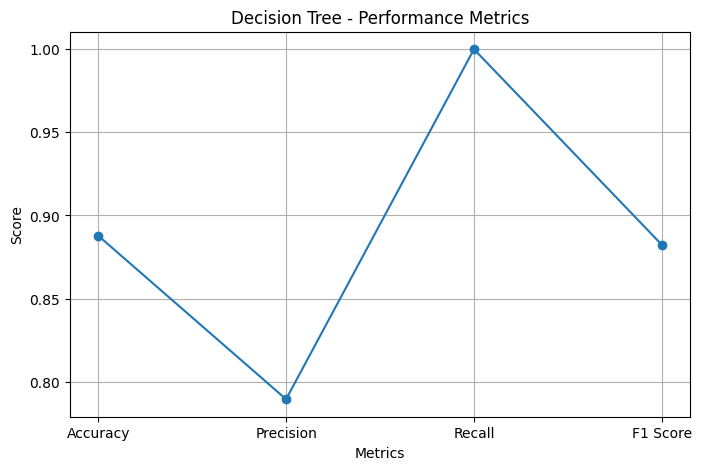


Random Forest Metrics:
Accuracy: 0.90
Precision: 0.83
Recall: 0.96
F1 Score: 0.89


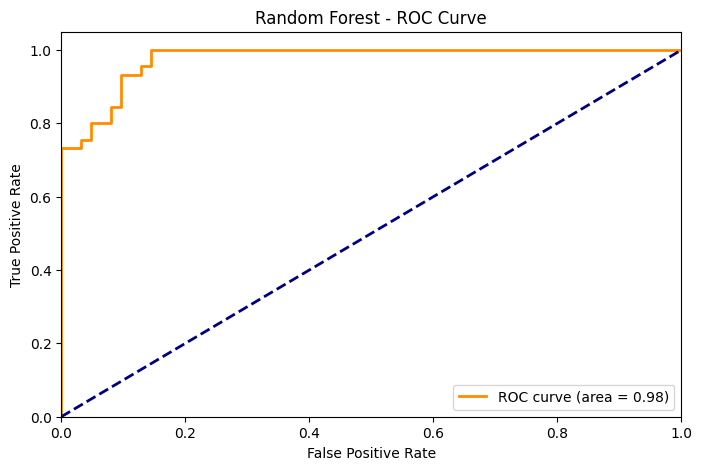

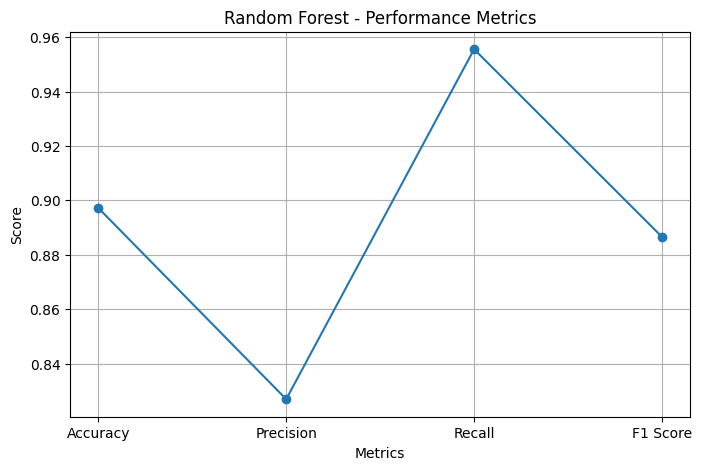


XG Boost Metrics:
Accuracy: 0.93
Precision: 0.89
Recall: 0.93
F1 Score: 0.91


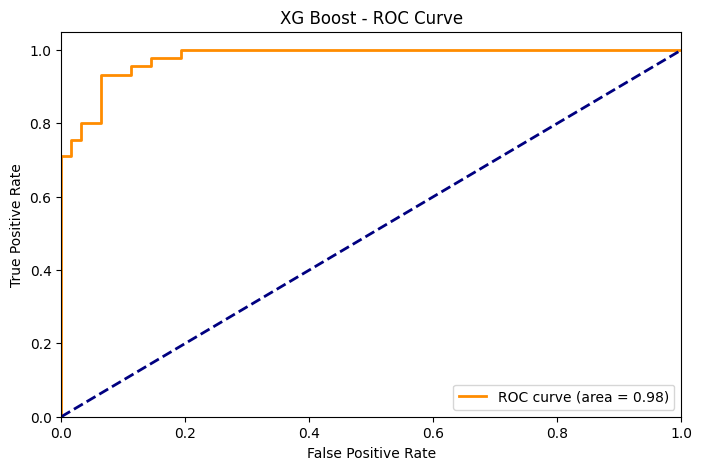

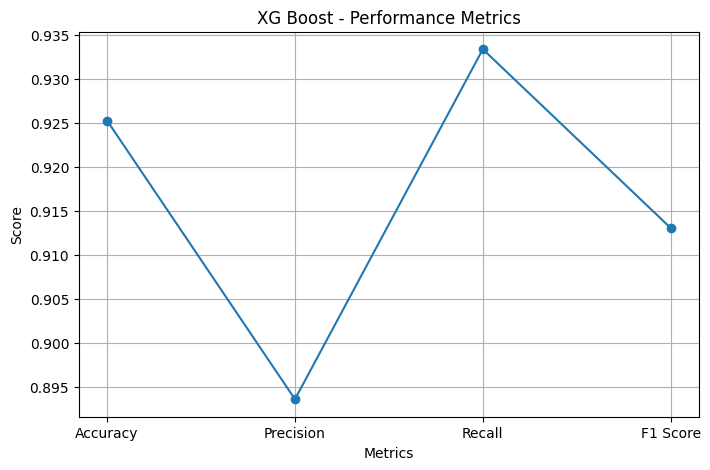

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('anemia.csv')
print('Before removing null and duplicate values:\n\n', data)
data = data.dropna()
data = data.drop_duplicates()
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
print('\nAfter removing null and duplicate values:\n\n', data)

sns.pairplot(data, hue='Result')
plt.show()
sns.countplot(x='Result', data=data)
plt.show()

X = data.drop(['Result', 'Gender'], axis=1)
y = data['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
xgboost_model = XGBClassifier(max_depth=3, n_estimators=50, random_state=42)

model_names = ['Decision Tree', 'Random Forest', 'XG Boost']

decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

def evaluate_model(model, X, y, model_name):
    predictions = model.predict(X)
    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)
    
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    plt.figure(figsize=(8, 5))
    plt.plot(list(metrics.keys()), list(metrics.values()), marker='o', linestyle='-')
    plt.title(f'{model_name} - Performance Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()

for model, name in zip([decision_tree_model, random_forest_model, xgboost_model], model_names):
    evaluate_model(model, X_test, y_test, name)
